In [11]:
import pandas as pd 
import matplotlib.pyplot as  plt 
import seaborn as sns
import plotly.graph_objs as go
import plotly.express as px
import plotly.io as pio

In [12]:
data = pd.read_csv("linkedin-reviews.csv")

In [13]:
print(data.head())

                                              Review  Rating
0  Does absolutely nothing for a LinkedIn beginne...       1
1                            Force close(galaxy tab)       1
2  Slow and it tries to upload your contacts with...       1
3  Add ability to customize the profile and move ...       4
4  Good app, but it's a pain that it's not possib...       4


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB


**<h4>Exploratory Data Analysis</h4>**

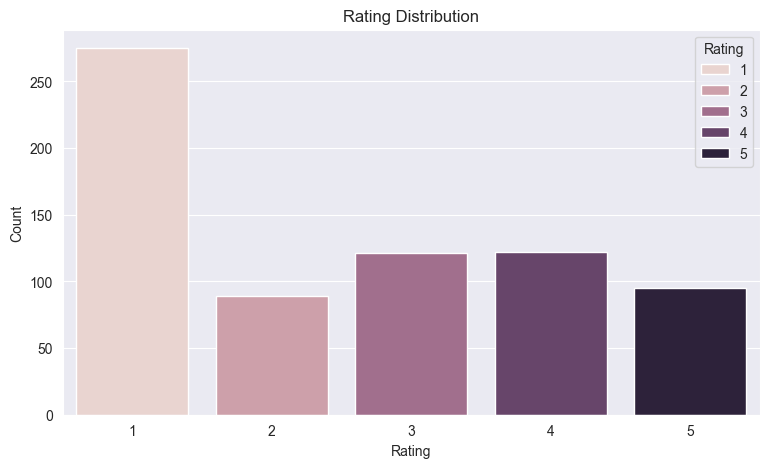

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(9,5))
sns.countplot(data, x='Rating', hue='Rating')
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [33]:
#Calculating the length of each review
data['Review Length']=data['Review'].apply(len)

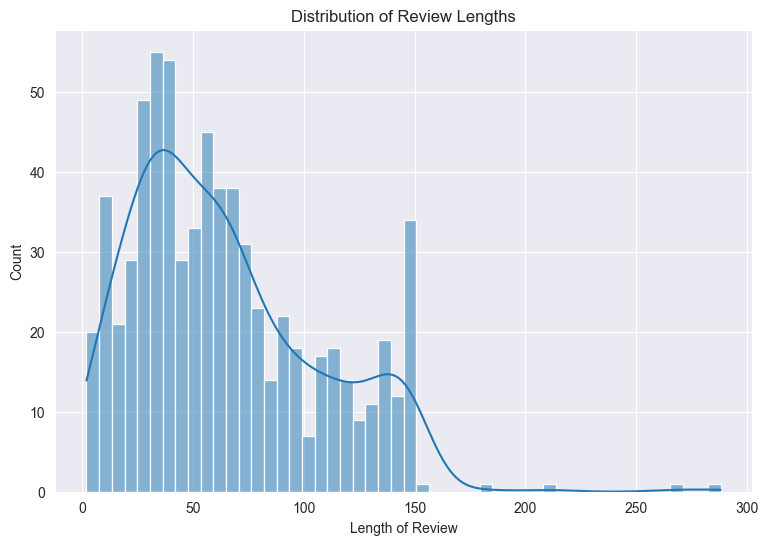

In [34]:
#Plotting the distribution of reviews lengths
plt.figure(figsize=(9, 6))
sns.histplot(data['Review Length'], bins=50, kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

**<h5>Adding Sentiment Labels in the Data using TEXTBLOB</h5>**

In [35]:
from textblob import TextBlob

In [36]:
def textblob_sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [39]:
data['Sentiment'] = data['Review'].apply(textblob_sentiment_analysis)
print(data.head(10))

                                              Review  Rating  Review Length  \
0  Does absolutely nothing for a LinkedIn beginne...       1             80   
1                            Force close(galaxy tab)       1             23   
2  Slow and it tries to upload your contacts with...       1             61   
3  Add ability to customize the profile and move ...       4             90   
4  Good app, but it's a pain that it's not possib...       4            133   
5  This app is poor and bad. Linkedin app on my H...       1             68   
6                                            Finally       5              7   
7  Have been using DroidIn. Ability to move to SD...       4             97   
8                   Works fine on Samsung Captivate.       4             32   
9  Clean design with limited features. How about ...       3             98   

  Sentiment  
0  Negative  
1   Neutral  
2  Negative  
3   Neutral  
4  Positive  
5  Negative  
6   Neutral  
7   Neutral  
8  P

**The dataset now includes sentiment labels for each review, classified as Positive, Negative, or Neutral based on the polarity score calculated by TextBlob.**

------------------------------------------------------------------------------------------------------------------------------------------------

**<h5>"Analyzing App Reviews Sentiments"</h5>**

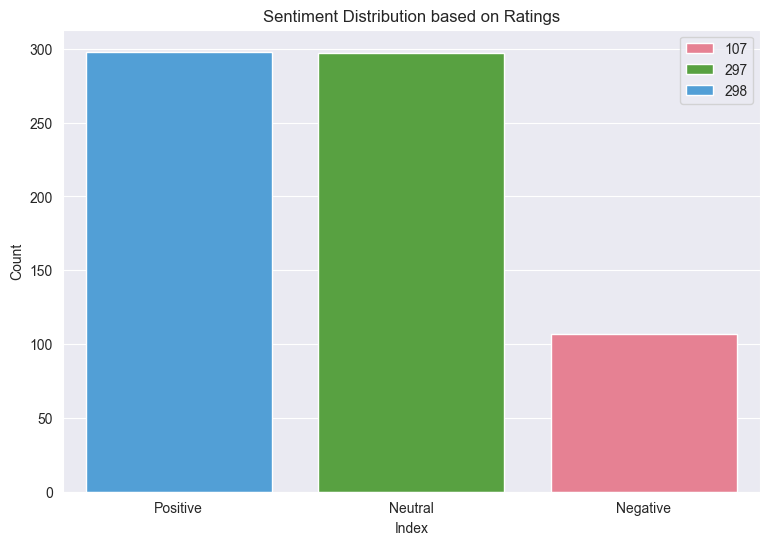

In [57]:
senti_dis = data['Sentiment'].value_counts()
#Plotting
custom_palette = sns.color_palette("husl", len(senti_dis))

plt.figure(figsize=(9,6))
sns.barplot(x=senti_dis.index, y=senti_dis.values, hue=senti_dis.values, palette=custom_palette)
plt.title("Sentiment Distribution based on Ratings")
plt.xlabel('Index')
plt.ylabel('Count')
plt.show()

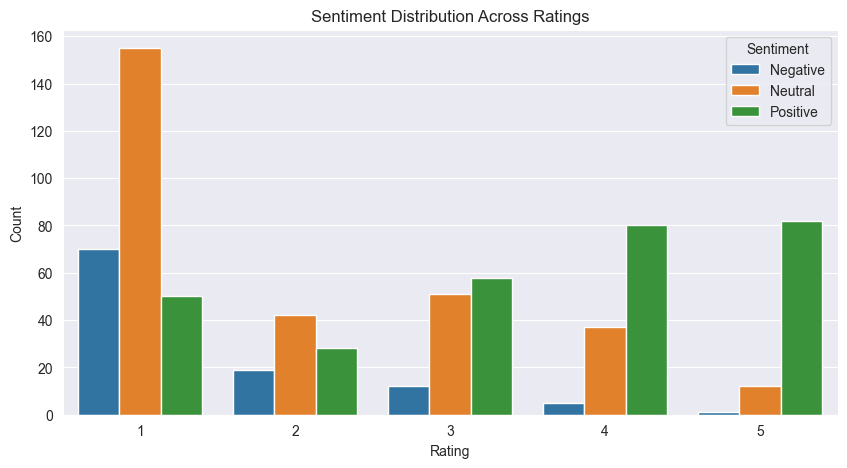

In [58]:
plt.figure(figsize=(10, 5))
sns.countplot(data, x='Rating', hue='Sentiment')
plt.title('Sentiment Distribution Across Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.show()

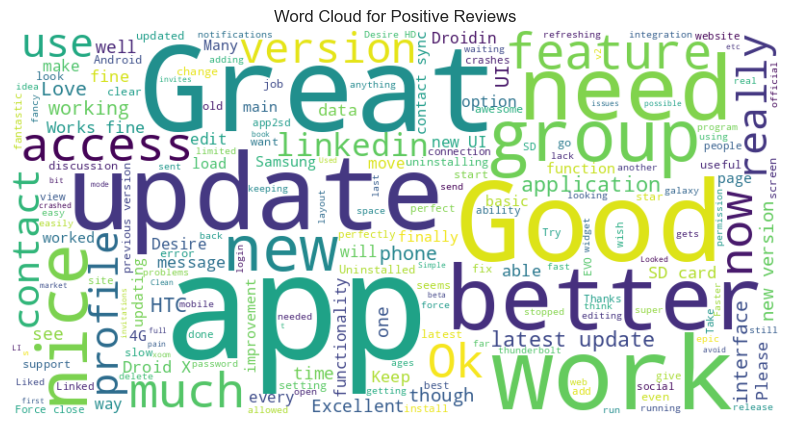

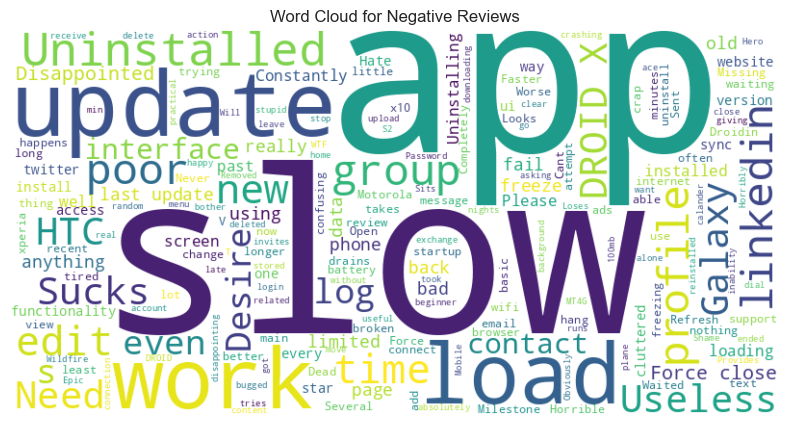

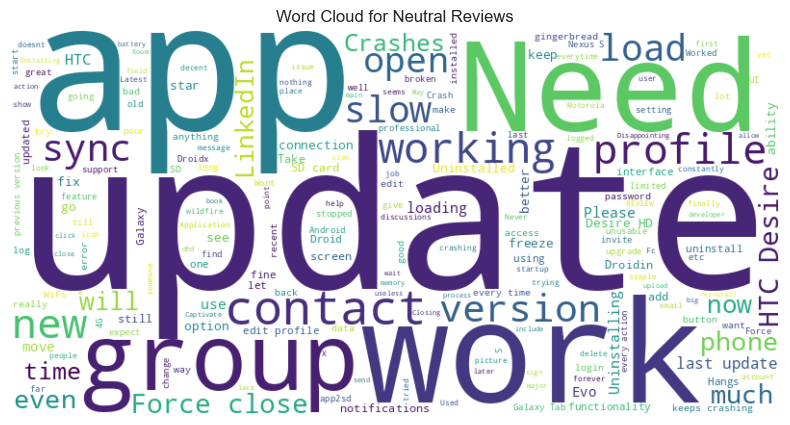

In [69]:
from wordcloud import WordCloud

#Function to generate  word cloud for each  sentiment
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in data[data['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()

# Generating word clouds for each sentiment
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)